## PySpark Load Data

In [1]:
from pyspark.sql.types import StructType, StructField
from pyspark.sql.types import DoubleType, IntegerType, StringType, FloatType
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName('Explore').getOrCreate()

# Load aisles.csv
SchemaOfAisle = StructType([StructField("aisle_id", IntegerType()), 
                           StructField("aisle", StringType())])
aisles = spark.read.csv ("../data/aisles.csv", 
                         header=True, mode="DROPMALFORMED", schema=SchemaOfAisle)
#aislesDF = aisles.toDF('aisle_id', 'aisle')

# Load departments.csv
SchemaOfDepartment = StructType([StructField('department_id', IntegerType()), 
                                StructField('department', StringType())])
departments = spark.read.csv ("../data/departments.csv", 
                             header=True, mode="DROPMALFORMED", schema=SchemaOfDepartment)

# Load order_products_prior.csv
SchemaOfOrderProductsPrior = StructType([StructField('order_id', IntegerType()),
                                         StructField('product_id', IntegerType()),
                                         StructField('add_to_cart_order', IntegerType()),
                                         StructField('Reordered', IntegerType())])
Order_Products_Prior = spark.read.csv("../data/order_products_prior.csv", 
                                      header=True, mode="DROPMALFORMED", schema=SchemaOfOrderProductsPrior)

# Load order_products_train.csv
SchemaOfOrderProductsTrain = StructType([StructField('order_id', IntegerType()),
                                         StructField('product_id', IntegerType()),
                                         StructField('add_to_cart_order', IntegerType()),
                                         StructField('Reordered', IntegerType())])
Order_Products_Train = spark.read.csv("../data/order_products_train.csv", 
                                      header=True, mode="DROPMALFORMED", schema=SchemaOfOrderProductsTrain)

# Load orders.csv
SchemaOfOrders = StructType([StructField('order_id', IntegerType()),
                             StructField('user_id', IntegerType()),
                             StructField('eval_set', StringType()),
                             StructField('order_number', IntegerType()),
                             StructField('order_dow', IntegerType()),
                             StructField('order_hour_of_day', IntegerType()),
                             StructField('days_since_prior_order', IntegerType())])

Orders = spark.read.csv("../data/orders.csv", 
                        header=True, mode="DROPMALFORMED", schema=SchemaOfOrders)

#grouped_dow_orders = Orders.groupBy('order_dow')
#count_grouped_dow_orders = sorted(grouped_dow_orders.agg({"*": "count"}).collect())

# Load products.csv
SchemaOfOrders = StructType([StructField('product_id', IntegerType()),
                             StructField('product_name', StringType()),
                             StructField('aisle_id', IntegerType()),
                             StructField('department_id', IntegerType())])

Orders = spark.read.csv("../data/products.csv", 
                        header=True, mode="DROPMALFORMED", schema=SchemaOfOrders)


## Pandas Load Data as Dataframe

In [2]:
import pandas as pd

aislesDF = pd.read_csv('../data/aisles.csv')
departmentDF = pd.read_csv('../data/departments.csv')
Order_Products_Prior_DF = pd.read_csv('../data/order_products_prior.csv')
Order_Products_Train_DF = pd.read_csv('../data/order_products_train.csv')
ordersDF = pd.read_csv('../data/orders.csv')
productsDF = pd.read_csv('../data/products.csv')

## Frequency of Reorders in a Week

Explore the change of order numbers from Monday to Sunday.

In [8]:
import matplotlib.pyplot as plt

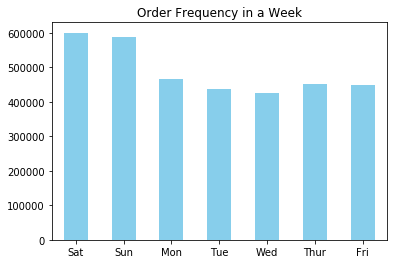

In [4]:
reorder_dow_freq = ordersDF['order_dow'].value_counts().sort_index()
reorder_dow_freq.index=['Sat', 'Sun', 'Mon', 'Tue', 'Wed', 'Thur', 'Fri']
reorder_dow_freq.plot(kind='bar', color="skyblue")
plt.xticks(rotation=0)
plt.title('Order Frequency in a Week')
plt.show()

## Frequency of Reorders in Hour of Day

Explore how order number changes in the hour of day.

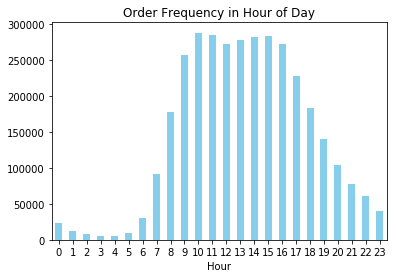

In [22]:
reorder_hour_of_day_freq = ordersDF['order_hour_of_day'].value_counts().sort_index()
#reorder_hour_of_day_freq.index = [str(i) for i in range(24)]
reorder_hour_of_day_freq.plot(kind='bar', color="skyblue")
plt.axvline(reorder_hour_of_day_freq.mean(), 
            linestyle='dashed', linewidth=2)
plt.xticks(rotation=0)
plt.title('Order Frequency in Hour of Day')
plt.xlabel('Hour')
plt.show()


## Interval of Reorders by Users

How often do customers put a new order?

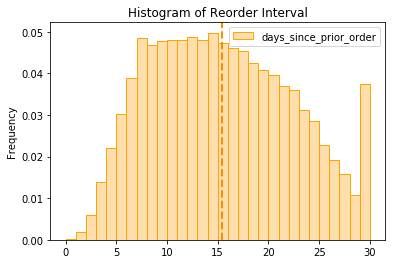

In [6]:
import numpy as np

reorder_user_interval = ordersDF[['user_id','days_since_prior_order']].groupby('user_id').aggregate(np.nanmean)
reorder_user_interval.plot.hist(normed=1, bins= 30, facecolor='navajowhite', edgecolor="orange")
plt.axvline(reorder_user_interval['days_since_prior_order'].mean(), 
            color='darkorange', linestyle='dashed', linewidth=2)
plt.title('Histogram of Reorder Interval')
plt.show()

## Popular Items in Shopping Cart History

In this part, let's see what are the most popular items on customers' order lists.

First take a look at each dataset, and then merge them into one dataframe with all the following included:
* user_id
* order_id
* product_id
* product_name

In [3]:
# All orders (prior & train): order_id, product_id
All_Order_Product=pd.concat([Order_Products_Prior_DF, Order_Products_Train_DF])

In [4]:
# orders in prior/train merged with product names
Order_Product_Name_Prior = pd.merge(Order_Products_Prior_DF, 
                                    productsDF, how='left', on='product_id')
Order_Product_Name_Train = pd.merge(Order_Products_Train_DF, 
                                    productsDF, how='left', on='product_id')

In [5]:
# Prior orders with user_id, product_id, product_name
Prior_User_Order_Product = pd.merge(Order_Product_Name_Prior, 
                                    ordersDF, how='left', on='order_id')

In [6]:
# Now we have all we need: order_id, product_id, user_id, product_name
Prior_User_Order_Product.head() 

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2,33120,1,1,Organic Egg Whites,86,16,202279,prior,3,5,9,8.0
1,2,28985,2,1,Michigan Organic Kale,83,4,202279,prior,3,5,9,8.0
2,2,9327,3,0,Garlic Powder,104,13,202279,prior,3,5,9,8.0
3,2,45918,4,1,Coconut Butter,19,13,202279,prior,3,5,9,8.0
4,2,30035,5,0,Natural Sweetener,17,13,202279,prior,3,5,9,8.0


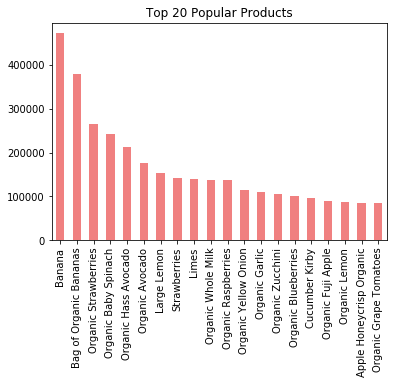

In [9]:
# top 20 most popular products
Products_Count = Prior_User_Order_Product['product_name'].value_counts()
Products_Count[0:20].plot(kind="bar", color='lightcoral')
plt.xticks(rotation=90)
plt.title('Top 20 Popular Products')
plt.show()

In [23]:
products_tuple_list = [tuple(x) for x in Products_Count.reset_index().values]

In [40]:
dic = {}
for pair in products_tuple_list:
    key = pair[0]
#     print(type(key))
    value = pair[1]
#     print(type(value))
    if key in dic:
        reservedValue = dic[key]
        reservedValue += value 
    else:
        dic[key] = value
print(dic)

{'Banana': 472565, 'Bag of Organic Bananas': 379450, 'Organic Strawberries': 264683, 'Organic Baby Spinach': 241921, 'Organic Hass Avocado': 213584, 'Organic Avocado': 176815, 'Large Lemon': 152657, 'Strawberries': 142951, 'Limes': 140627, 'Organic Whole Milk': 137905, 'Organic Raspberries': 137057, 'Organic Yellow Onion': 113426, 'Organic Garlic': 109778, 'Organic Zucchini': 104823, 'Organic Blueberries': 100060, 'Cucumber Kirby': 97315, 'Organic Fuji Apple': 89632, 'Organic Lemon': 87746, 'Apple Honeycrisp Organic': 85020, 'Organic Grape Tomatoes': 84255, 'Seedless Red Grapes': 82689, 'Organic Cucumber': 80392, 'Honeycrisp Apple': 79769, 'Organic Baby Carrots': 76896, 'Organic Half & Half': 76360, 'Sparkling Water Grapefruit': 75886, 'Organic Large Extra Fancy Fuji Apple': 75165, 'Yellow Onions': 73167, 'Organic Gala Apples': 72846, 'Organic Baby Arugula': 72829, 'Carrots': 72736, 'Fresh Cauliflower': 71584, 'Original Hummus': 71314, 'Organic Cilantro': 69524, 'Half & Half': 69217, '

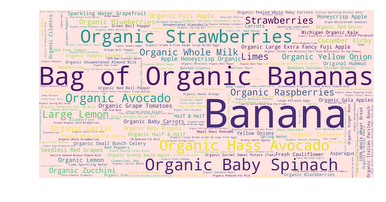

In [54]:
from os import path
from wordcloud import WordCloud

wordcloudData = WordCloud(width=4096,height=2048,relative_scaling=1,background_color='mistyrose').generate_from_frequencies(frequencies = dic)
plt.imshow(wordcloudData, interpolation='lanczos')
plt.axis("off")
plt.show()